# Week 1 Assignment

In [57]:
import numpy as np
import pandas as pd
import edhec_risk_kit_106 as erk

Read in the data in the file “Portfolios_Formed_on_ME_monthly_EW.csv” as we did in the lab sessions. We performed a series of analysis on the ‘Lo 10’ and the ‘Hi 10’ columns which are the returns of the lowest and highest decile portfolios. For purposes of this assignment, we will use the lowest and highest quintile portfolios, which are labelled ‘Lo 20’ and ‘Hi 20’ respectively.

In [58]:
data = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
data.index = pd.to_datetime(data.index, format="%Y%m").to_period('M')                  
data.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
1926-07,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
1926-08,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
1926-09,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
1926-10,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
1926-11,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [59]:
cols = ['Lo 20', 'Hi 20']
returns = data[cols]/100
returns.head()

,Lo 20,Hi 20
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


## 1. Question 1

What was the Annualized Return of the Lo 20 portfolio over the entire period?

In [60]:
n_months = returns.shape[0]
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return[0]

0.15197701163833743

## 2. Question 2
What was the Annualized Volatility of the Lo 20 portfolio over the entire period? 

In [61]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol[0]

0.3367012751715777

## 3. Question 3
What was the Annualized Return of the Hi 20 portfolio over the entire period?     

In [62]:
annualized_return[1]

0.09849020951253151

## 4. Question 4
What was the Annualized Volatility of the Hi 20 portfolio over the entire period ?  

In [63]:
annualized_vol[1]

0.19511604155631326

## 5. Question 5
What was the Annualized Return of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)?

In [64]:
returns_p = returns["1999":"2015"]
n_months_p = returns_p.shape[0]
annualized_return_p = (returns_p+1).prod()**(12/n_months_p) - 1
annualized_return_p[0]

0.11442634058514933

## 6. Question 6
What was the Annualized Volatility of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)? 

In [65]:
annualized_vol_p = returns_p.std()*np.sqrt(12)
annualized_vol_p[0]

0.22889447266699597

## 7. Question 7
What was the Annualized Return of the Hi 20 portfolio over the period  1999 - 2015 (both inclusive)?

In [66]:
annualized_return_p[1]

0.06286512130085109

## 8. Question 8
What was the Annualized Volatility of the Hi 20 portfolio over the period 1999 - 2015 (both inclusive)?  

In [67]:
annualized_vol_p[1]

0.1727133212125047

## 9. Question 9
What was the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the SmallCap (Lo 20) portfolio?

<AxesSubplot: >

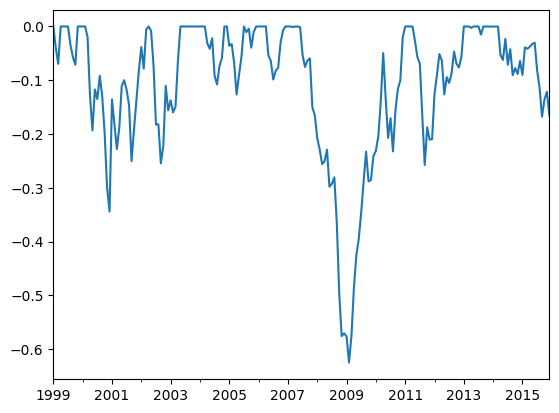

In [68]:
erk.drawdown(returns_p["Lo 20"])["Drawdown"].plot()

In [69]:
erk.drawdown(returns_p["Lo 20"]).min()

Wealth           1034.189842
Previous Peak    1111.400000
Drawdown           -0.624809
dtype: float64

## 10. Question 10
At the end of which month over the period 1999-2015 did that maximum drawdown on the SmallCap (Lo 20) portfolio occur?

In [70]:
erk.drawdown(returns_p["Lo 20"])["Drawdown"].idxmin()

Period('2009-02', 'M')

## 11. Question 11
What was the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the LargeCap (Hi 20) portfolio?

In [71]:
erk.drawdown(returns_p["Hi 20"]).min()

Wealth            721.706638
Previous Peak    1015.300000
Drawdown           -0.552735
dtype: float64

## 12. Question 12
Over the period 1999-2015, at the end of which month did that maximum drawdown of the LargeCap (Hi 20) portfolio occur?

In [72]:
erk.drawdown(returns_p["Hi 20"])["Drawdown"].idxmin()

Period('2009-02', 'M')

## 13. Question 13
For the remaining questions, use the EDHEC Hedge Fund Indices data set that we used in the lab assignment and load them into Python.

In [73]:
hfi = erk.get_hfi_returns()
hfi_p = hfi["2009":"2018"]
hfi_p.head()

c:\Users\jlche\OneDrive\GitHub\Finance\Edhec\C1\edhec_risk_kit_106.py:36: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hfi = pd.read_csv("data/edhec-hedgefundindices.csv",


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2009-01,0.0491,-0.0016,0.0082,-0.0112,0.0079,0.0132,0.0112,0.0029,-0.0017,0.0056,0.0100,0.0282,0.0060
2009-02,0.0164,-0.0031,-0.0122,-0.0133,-0.0046,-0.0091,0.0065,-0.0055,-0.0161,0.0006,-0.0016,0.0328,-0.0037
2009-03,0.0235,-0.0180,0.0022,0.0350,0.0021,0.0117,0.0057,0.0048,0.0188,0.0125,0.0100,-0.0462,0.0008
2009-04,0.0500,-0.0140,0.0387,0.0663,-0.0012,0.0337,0.0221,0.0127,0.0375,0.0081,0.0342,-0.0820,0.0092
2009-05,0.0578,0.0213,0.0504,0.0884,0.0146,0.0442,0.0365,0.0348,0.0516,0.0107,0.0392,0.0008,0.0312


Looking at the data since 2009 (including all of 2009) through 2018 which Hedge Fund Index has exhibited the highest semideviation? 

In [74]:
erk.semideviation(hfi_p).sort_values()

Fixed Income Arbitrage    0.003321
Merger Arbitrage          0.003611
Global Macro              0.005075
Equity Market Neutral     0.005186
Relative Value            0.005711
Convertible Arbitrage     0.006681
Funds Of Funds            0.007948
Distressed Securities     0.009498
Event Driven              0.010135
CTA Global                0.010996
Long/Short Equity         0.012139
Emerging Markets          0.015276
Short Selling             0.021240
dtype: float64

## 14. Question 14
Looking at the data since 2009 (including all of 2009) which Hedge Fund Index has exhibited the lowest semideviation?

## 15. Question 15
Looking at the data since 2009 (including all of 2009) which Hedge Fund Index has been most negatively skewed?    

In [75]:
erk.skewness(hfi_p).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

## 16. Question 16
Looking at the data since 2000 (including all of 2000) through 2018 which Hedge Fund Index has exhibited the highest kurtosis?

In [80]:
hfi_p2 = hfi["2000":"2018"]
erk.kurtosis(hfi_p2).sort_values()

CTA Global                 2.845022
Global Macro               3.653278
Short Selling              4.352758
Long/Short Equity          4.472589
Merger Arbitrage           4.520785
Event Driven               5.543444
Emerging Markets           5.941289
Distressed Securities      6.231720
Funds Of Funds             7.584725
Relative Value            12.731096
Equity Market Neutral     20.329621
Convertible Arbitrage     23.001449
Fixed Income Arbitrage    33.378729
dtype: float64